# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [6]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [6]:
# Taking a look at the head
websites.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,charset_numeric
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,2,700,9,10,1153,832,9,2.0,1,1.0
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,4,1230,17,19,1265,1230,17,0.0,0,2.0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0.0,0,3.0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,3,3812,39,37,18784,4380,39,8.0,0,1.0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,5,4278,61,62,129889,4586,61,4.0,0,2.0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,9,894,11,13,838,894,11,0.0,0,2.0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,3,1189,14,13,8559,1327,14,2.0,0,1.0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0.0,0,3.0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,2,3,213,146,2,2.0,1,2.0
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,2,1,62,146,2,2.0,1,2.0


In [7]:
# Checking data types and NULL count
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [9]:
# Exploring URL column
print('# of URL values: ', len(websites['URL'].unique()))
websites['URL'].unique()

# From the URL, it seems the actual URL is hashed or transformed into a code

# of URL values:  1781


array(['M0_109', 'B0_2314', 'B0_911', ..., 'B0_162', 'B0_1152', 'B0_676'],
      dtype=object)

In [10]:
# Looking at Charset
websites['CHARSET'].unique()
# Considering we have 9 values, we can transform those into some numerical categories, also some are the same ones
# just the char case is different

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [26]:
# Looking at Server
import re
servers = websites['SERVER'].unique()
print('# Unique Server values:', len(servers))
# Considering the wide range of values, the raw values will be hard to transform
# But we can potentially categorise them using first word which more focuses on the
# technology family used, such as nginx, apache, microsoft, etc.
# To do this, we will pick the first Word in the Server String
cleaned_servers = [ re.search(r'\w+',i.lower()).group() for i in servers if type(i) != float]

# Now we will deduplicate the list
unique_cleaned_servers = []
for i in cleaned_servers:
    if i not in unique_cleaned_servers:
        unique_cleaned_servers.append(i)

print('# Cleaned Unique server values: ', len(unique_cleaned_servers))
# Considering the number of unique values, we might opt to drop it

# Unique Server values: 240
# Cleaned Unique server values:  107


In [31]:
websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [28]:
# Exploring Type
websites['Type'].unique()
# looking at the output, this seems to be the result of our prediction

array([1, 0])

In [29]:
# Looking at example of websites with Type 1
websites[websites['Type'] == 1].head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.0,1
15,M0_71,21,7,ISO-8859-1,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,957.0,UK,None,16/07/2000 0:00,4/07/2015 0:00,...,0,1,717,11,10,1960,1011,11,4.0,1
16,M0_97,21,7,iso-8859-1,nginx,686.0,RU,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,...,0,2,603,8,9,1580,745,8,2.0,1


In [30]:
# Looking at record count for each type
websites.groupby('Type').agg('count')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
Type,,,,,,,,,,,,,,,,,,,,
0,1565,1565,1565,1565,1564,863,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1564
1,216,216,216,216,216,106,216,216,216,216,216,216,216,216,216,216,216,216,216,216


In [ ]:
# Our guess is that website's Type == 0 if benign and Type == 1 if malicious

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

/var/folders/jh/f7ylkkgs0gjd18k26rk_7ypc0000gp/T/ipykernel_1231/192792170.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr())


<Axes: >

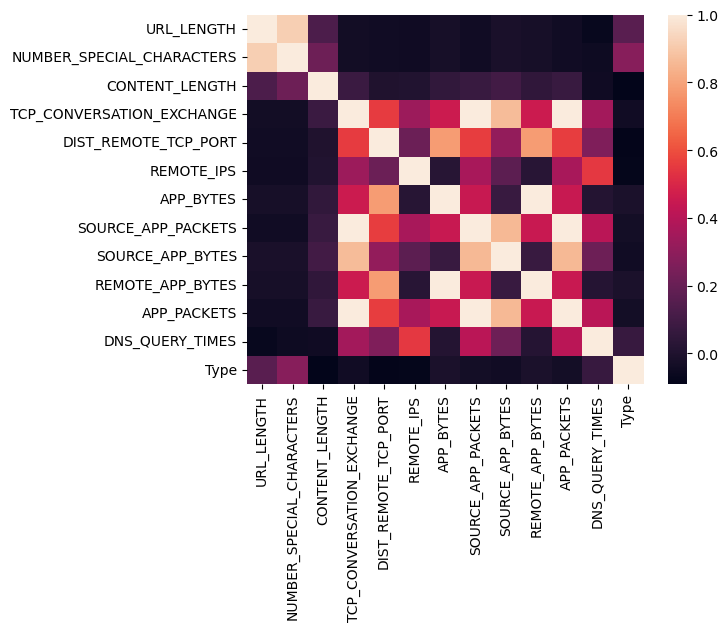

In [4]:
# Your code here
import seaborn as sns
sns.heatmap(websites.corr())

In [6]:
# Your comment here
# It seems *_packets have high collinearity

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

/var/folders/jh/f7ylkkgs0gjd18k26rk_7ypc0000gp/T/ipykernel_1231/1156516511.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr())


<Axes: >

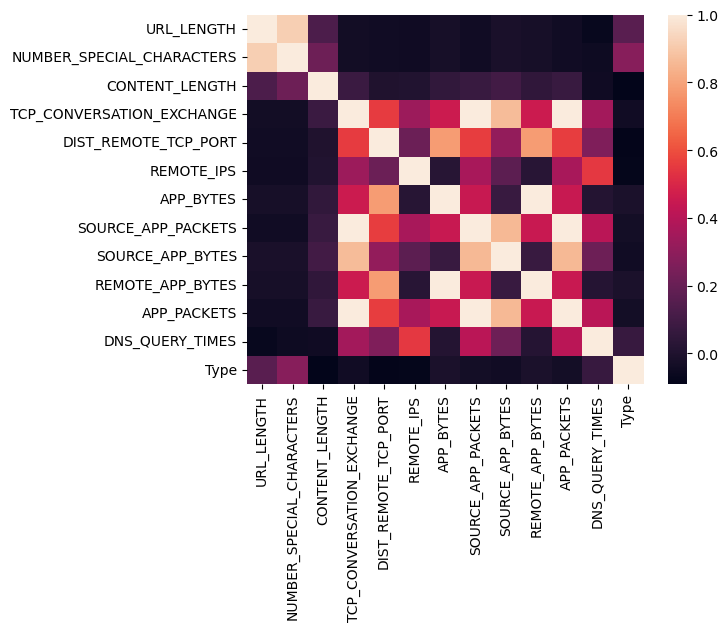

In [8]:
# Your code here
# Removing REMOTE_APP_PACKETS
websites.drop(columns=['REMOTE_APP_PACKETS'],inplace=True)
sns.heatmap(websites.corr())

/var/folders/jh/f7ylkkgs0gjd18k26rk_7ypc0000gp/T/ipykernel_1231/483120246.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr())


<Axes: >

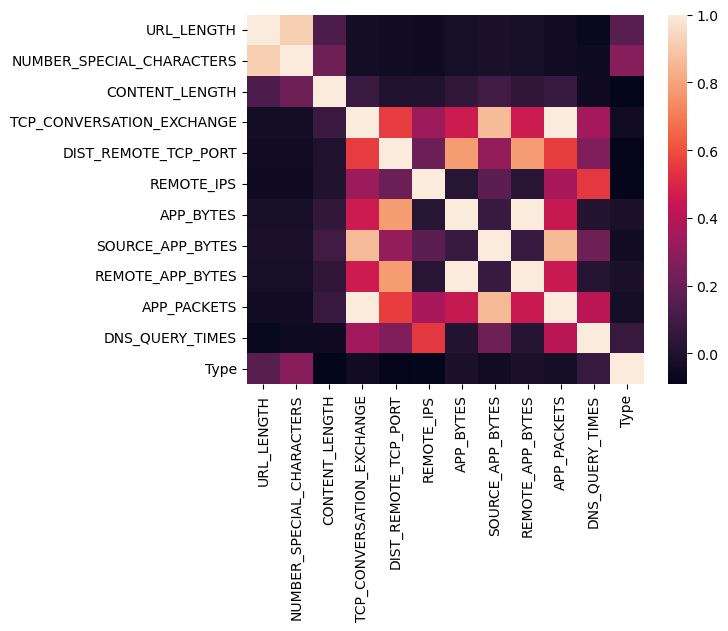

In [9]:
# Your comment here
# Still we have the issue between app_packets as well as TCP_Conversation_exchange
# So removing Source_App_Packets
websites.drop(columns=['SOURCE_APP_PACKETS'],inplace=True)
sns.heatmap(websites.corr())

/var/folders/jh/f7ylkkgs0gjd18k26rk_7ypc0000gp/T/ipykernel_1231/2283109753.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr())


<Axes: >

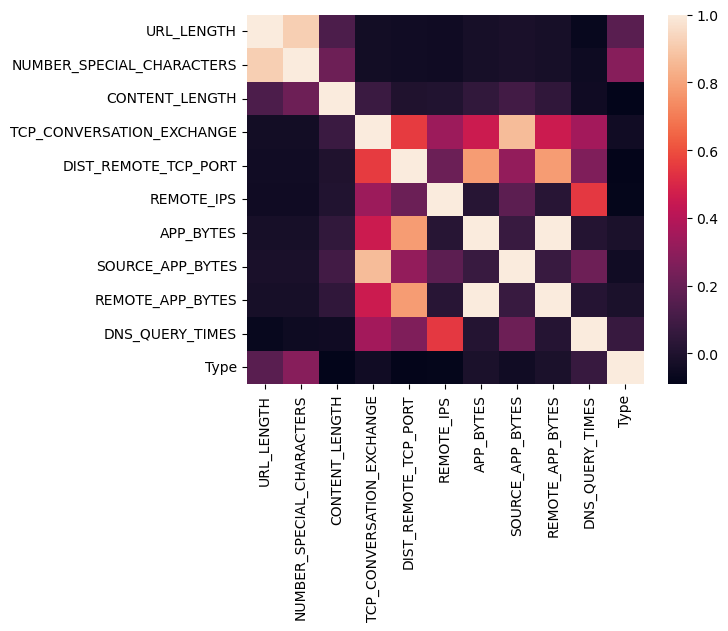

In [10]:
# Removing APP_PACKETS
websites.drop(columns=['APP_PACKETS'],inplace=True)
sns.heatmap(websites.corr())


/var/folders/jh/f7ylkkgs0gjd18k26rk_7ypc0000gp/T/ipykernel_1231/2019185735.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr())


<Axes: >

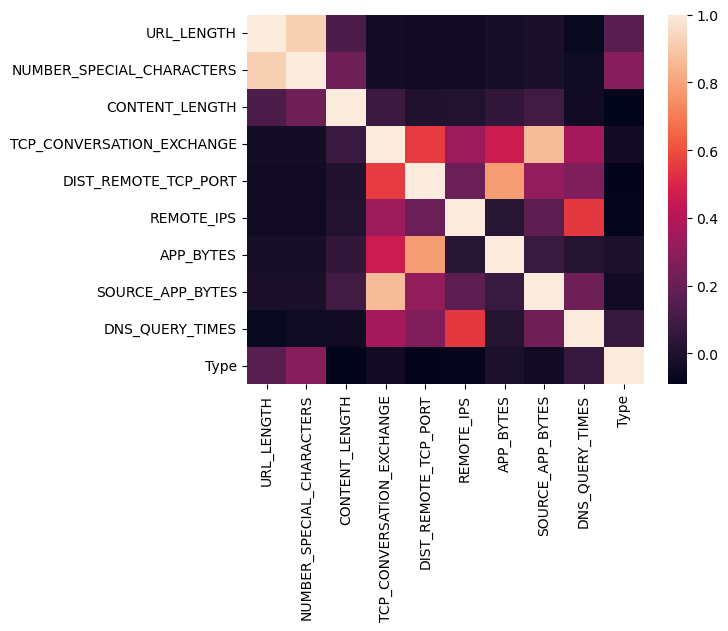

In [11]:
# Removing REMOTE_APP_BYTES as well
websites.drop(columns=['REMOTE_APP_BYTES'],inplace=True)
sns.heatmap(websites.corr())

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [12]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [13]:
# Dropping Content_length since it has around 50% missing values
websites.drop(columns=['CONTENT_LENGTH'],inplace=True)

# We also have one row with missing SOURCE_APP_BYTES and SERVER value, which we can drop
websites.dropna(inplace=True)
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   URL_LENGTH                 1779 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 3   CHARSET                    1779 non-null   object 
 4   SERVER                     1779 non-null   object 
 5   WHOIS_COUNTRY              1779 non-null   object 
 6   WHOIS_STATEPRO             1779 non-null   object 
 7   WHOIS_REGDATE              1779 non-null   object 
 8   WHOIS_UPDATED_DATE         1779 non-null   object 
 9   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 10  DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 11  REMOTE_IPS                 1779 non-null   int64  
 12  APP_BYTES                  1779 non-null   int64  
 13  SOURCE_APP_BYTES           1779 non-null   int64

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [14]:
# Examine missing values in each column
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   URL_LENGTH                 1779 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 3   CHARSET                    1779 non-null   object 
 4   SERVER                     1779 non-null   object 
 5   WHOIS_COUNTRY              1779 non-null   object 
 6   WHOIS_STATEPRO             1779 non-null   object 
 7   WHOIS_REGDATE              1779 non-null   object 
 8   WHOIS_UPDATED_DATE         1779 non-null   object 
 9   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 10  DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 11  REMOTE_IPS                 1779 non-null   int64  
 12  APP_BYTES                  1779 non-null   int64  
 13  SOURCE_APP_BYTES           1779 non-null   int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [15]:
# Your code here
def get_country_code(v):
    
    # handle NA value
    if type(v) == float:
        return v
    if v == 'Cyprus':
        return 'CY'
    if v == 'United Kingdom' or v == "[u'GB'; u'UK']":
        return 'GB'
    return v.upper()

websites['WHOIS_COUNTRY'] = websites.apply(lambda r: get_country_code(r['WHOIS_COUNTRY']), axis=1)
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,NONE,None,10/10/2015 18:21,None,7,0,2,700,1153,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,NONE,None,None,None,17,7,4,1230,1265,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,NONE,None,None,None,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,18784,8.0,0
4,B0_403,17,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,129889,4.0,0


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [16]:
# Your code here
websites['WHOIS_COUNTRY'].value_counts()

US      1105
NONE     306
CA        83
ES        63
AU        35
GB        25
PA        21
JP        11
UK        10
CN        10
IN        10
FR         9
CZ         9
NL         6
CH         6
RU         6
KR         5
AT         4
SE         4
BS         4
PH         4
BE         3
HK         3
TR         3
DE         3
KY         3
SC         3
UA         2
CY         2
UY         2
KG         2
BR         2
NO         2
IL         2
SI         2
LV         1
PK         1
IT         1
LU         1
BY         1
AE         1
IE         1
UG         1
TH         1
Name: WHOIS_COUNTRY, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [17]:
# Your code here
top_country = ['US','CA','ES','AU','GB','PA','JP','UK','CN','IN']
def relabel_country(row):
    v = row['WHOIS_COUNTRY']
    if v in top_country:
        return v
    return 'OTHER'

websites['WHOIS_COUNTRY'] = websites.apply(relabel_country, axis=1)
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,OTHER,None,10/10/2015 18:21,None,7,0,2,700,1153,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,OTHER,None,None,None,17,7,4,1230,1265,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,OTHER,None,None,None,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,18784,8.0,0
4,B0_403,17,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,129889,4.0,0


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [18]:
# Your code here
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [19]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   URL_LENGTH                 1779 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 3   CHARSET                    1779 non-null   object 
 4   SERVER                     1779 non-null   object 
 5   WHOIS_COUNTRY              1779 non-null   object 
 6   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 7   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 8   REMOTE_IPS                 1779 non-null   int64  
 9   APP_BYTES                  1779 non-null   int64  
 10  SOURCE_APP_BYTES           1779 non-null   int64  
 11  DNS_QUERY_TIMES            1779 non-null   float64
 12  Type                       1779 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage:

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [20]:
# Your code here
websites.drop(columns=['URL'], inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [21]:
# Your code here
# We used the lower case to reduce number of unique cases
websites['CHARSET'] = websites['CHARSET'].str.lower()
websites['CHARSET'].value_counts()

utf-8           1053
iso-8859-1       561
us-ascii         155
none               7
windows-1251       1
iso-8859           1
windows-1252       1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [21]:
# Your code here
# Keep the mainstream servers

![Think Hard](../images/think-hard.jpg)

In [24]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [22]:
# Your code here
top_servers = ['microsoft','apache','nginx']
def relabel_servers(row):
    v = row['SERVER'].lower()
    for i in top_servers:
        if v.find(i) >= 0:
            return i
    return 'other'
websites['SERVER'] = websites.apply(relabel_servers, axis=1)

In [23]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()

apache       642
other        503
nginx        436
microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [24]:
# Your code here
website_dummy = pd.get_dummies(websites)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [31]:
# Your code here
website_dummy.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_BYTES',
       'DNS_QUERY_TIMES', 'Type', 'CHARSET_iso-8859', 'CHARSET_iso-8859-1',
       'CHARSET_none', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'SERVER_apache',
       'SERVER_microsoft', 'SERVER_nginx', 'SERVER_other', 'WHOIS_COUNTRY_AU',
       'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN', 'WHOIS_COUNTRY_ES',
       'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_JP',
       'WHOIS_COUNTRY_OTHER', 'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK',
       'WHOIS_COUNTRY_US'],
      dtype='object')

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [32]:
train_data_columns = [i for i in website_dummy.columns if i != "Type"]
train_data_columns

['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_BYTES',
 'DNS_QUERY_TIMES',
 'CHARSET_iso-8859',
 'CHARSET_iso-8859-1',
 'CHARSET_none',
 'CHARSET_us-ascii',
 'CHARSET_utf-8',
 'CHARSET_windows-1251',
 'CHARSET_windows-1252',
 'SERVER_apache',
 'SERVER_microsoft',
 'SERVER_nginx',
 'SERVER_other',
 'WHOIS_COUNTRY_AU',
 'WHOIS_COUNTRY_CA',
 'WHOIS_COUNTRY_CN',
 'WHOIS_COUNTRY_ES',
 'WHOIS_COUNTRY_GB',
 'WHOIS_COUNTRY_IN',
 'WHOIS_COUNTRY_JP',
 'WHOIS_COUNTRY_OTHER',
 'WHOIS_COUNTRY_PA',
 'WHOIS_COUNTRY_UK',
 'WHOIS_COUNTRY_US']

In [40]:
from sklearn.model_selection import train_test_split

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(
    website_dummy[train_data_columns],
    website_dummy["Type"],
    test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [44]:
# Your code here:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [45]:
# Your code here:
model = model.fit(X_train, y_train)
print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ", model.score(X_train, y_train))

test data accuracy was  0.9129213483146067
train data accuracy was  0.9163738580463809


/Users/san/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [47]:
# Your code here:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
print("Accouracy: ", accuracy_score(y_test,y_pred))
confusion_matrix(y_test, y_pred)

Accouracy:  0.9129213483146067


array([[299,   9],
       [ 22,  26]])

What are your thoughts on the performance of the model? Write your conclusions below.

In [33]:
# Your conclusions here:

# Looking at confusion matrix, we see that true positive (26) and true negatives (229) are relatively high
# and false positive and false negatives are relatively low, which means the model is accurate, and that
# matches the 91% accuracy that comes from accuracy score

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [48]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model = model.fit(X_train, y_train)
print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ", model.score(X_train, y_train))

test data accuracy was  0.9213483146067416
train data accuracy was  0.9599437807449052


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [49]:
# Your code here:
y_pred = model.predict(X_test)
print("Accouracy: ", accuracy_score(y_test,y_pred))
confusion_matrix(y_test, y_pred)


Accouracy:  0.9213483146067416


array([[301,   7],
       [ 21,  27]])

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [50]:
# Your code here:
model = KNeighborsClassifier(n_neighbors = 5)
model = model.fit(X_train, y_train)
print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ", model.score(X_train, y_train))
y_pred = model.predict(X_test)
print("Accouracy: ", accuracy_score(y_test,y_pred))
confusion_matrix(y_test, y_pred)

test data accuracy was  0.9325842696629213
train data accuracy was  0.9508081517919887
Accouracy:  0.9325842696629213


array([[304,   4],
       [ 20,  28]])

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
# Your conclusions here:

# Increasing the value of K, slightly increased the accuracy of the model from 92% to 93%, which can be seen in the
# confusion matrix as well. The improvement seems to affect false positive cases more, but might need more tests 
# to confirm. If that is the case, it can be a good improvement


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here